# AML Assignment 3
## Supreet Singh CS16BTECH11038

# Q3

## (A)


In [4]:
# imports
import numpy as np
import csv

In [50]:
#load data
#f= open("linregdata", "r")
#rawSet_3 = np.loadtxt(f)
with open("linregdata") as f:
    next(f, None)
    data = [tuple(line) for line in csv.reader(f, delimiter=",")]
    #print ("Number of records: %d" % (len(data)))

In [51]:
print(data[0])

('M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7')


In [52]:
# Converting M,F,I to numbers!
rawSet_3 = []
i_3 = 0
for line in data:
    rawSet_3.append([])
    if line[0]=='F':
        rawSet_3[i_3].append(1)
        rawSet_3[i_3].append(0)
        rawSet_3[i_3].append(0)
        #print(rawSet_3[i_3],i_3)
    elif line[0]=='I':
        rawSet_3[i_3].append(0)
        rawSet_3[i_3].append(1)
        rawSet_3[i_3].append(0)
    else:
        rawSet_3[i_3].append(0)
        rawSet_3[i_3].append(0)
        rawSet_3[i_3].append(1)
    for x in line[1:]:
        rawSet_3[i_3].append(float(x))
    i_3+=1
    #print(rawSet_3[i_3-1])

In [53]:
print(rawSet_3[0])

[0, 0, 1, 0.35, 0.265, 0.09, 0.2255, 0.0995, 0.0485, 0.07, 7.0]


## (B)

In [101]:
# get means, stds
rawSet_3np = np.array(rawSet_3)
means = rawSet_3np.mean(axis=0)
print("means: ", means)
stds = rawSet_3np.std(axis=0)
print("std devs: ", stds)
# standardise:

for line in rawSet_3np:
    for i, x in enumerate(line[:-1]):
        line[i] = (line[i]-means[i])/stds[i]

means:  [0.31297893 0.32136015 0.36566092 0.52400862 0.40789152 0.13952706
 0.82881753 0.35939978 0.18061267 0.23885213 9.93247126]
std devs:  [0.46370585 0.46699872 0.481615   0.12008817 0.09923765 0.04182138
 0.49036483 0.22195313 0.10960733 0.13919588 3.22321548]


In [99]:
print(rawSet_3np)

[[-0.67495143 -0.68813926  1.31710822 ... -1.20532696 -1.21305408
   7.        ]
 [ 1.4815881  -0.68813926 -0.75923905 ... -0.35684354 -0.20727719
   9.        ]
 [-0.67495143 -0.68813926  1.31710822 ... -0.60773918 -0.60240383
  10.        ]
 ...
 [-0.67495143 -0.68813926  1.31710822 ...  0.97518418  0.49676663
   9.        ]
 [ 1.4815881  -0.68813926 -0.75923905 ...  0.73341202  0.41055718
  10.        ]
 [-0.67495143 -0.68813926  1.31710822 ...  1.78717368  1.84019719
  12.        ]]


In [125]:
print(rawSet_3np.std(axis=0))


[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         3.22321548]


## (C)

In [176]:
def myLinRidgeReg(Xd, Yd, λ): #returns regression weights, Xd: matrix, Yd:vector
    # Xd, Yd are python lists!
    X = np.array(Xd)
    Y = np.array(Yd)
    a1 = np.matmul(X.T, X)
    #print(a1.shape)
    a2 = np.identity(a1.shape[0])
    a2 *= λ
    a3 = np.linalg.inv(np.add(a2, a1))
    #print(type(a3))
    #print(a3.shape)
    #print(X.T.shape)
    a4 = np.matmul(a3, X.T)
    a5 = np.matmul(a4, Y)
    return a5
    
def myLinRidgeRegVal(xd, Wd): # 
    X = np.array(xd)
    W = np.array(Wd)
    return np.dot(X, W)

def meanSquaredError(T, Tdash):
    sum=0.0
    if len(T) != len(Tdash):
        print("Error in MSE function, len not same!")
        return 0.0
    for i, x in enumerate(T):
        sum += ((T[i]-Tdash[i])**2)
    
    sum /= len(T)
    return sum

## (D and E)

In [130]:
#shuffle ( a copy of the original array)!
import random

rawSet_3np_new = []

# inserting bias term:
for i, line in enumerate(rawSet_3np):
    rawSet_3np_new.append(np.insert(rawSet_3np[i], 0, 1, axis=0))

#print(rawSet_3np_new)
    
workSet_3 = rawSet_3np_new.copy()
np.random.shuffle(workSet_3)


In [200]:
#partition fraction
pf_3 = 0.2

# Split into test and train data
n_3 = len(workSet_3)
testMat_3 = workSet_3[:int(pf_3*n_3)] 
trainMat_3 = workSet_3[int(pf_3*n_3):]

trainX_3 = []
trainY_3 = []
for line in trainMat_3:
    trainX_3.append(line[:-1])
    trainY_3.append(line[-1])

testX_3 = []
testY_3 = []
for line in testMat_3:
    testX_3.append(line[:-1])
    testY_3.append(line[-1])
    

In [201]:
# different values of lambda:
λ_list = [0, 0.1,0.2,0.5,1,2,10,80]

In [202]:
print("TEST DATA PERFORMANCE: ")

for λ in λ_list:
    cur_wts = myLinRidgeReg(trainX_3, trainY_3, λ)
    preds = myLinRidgeRegVal(testX_3, cur_wts)
    print("\nfor λ: ", λ, "\nwts: ", cur_wts)
    print("MSE: ", meanSquaredError(preds, testY_3))

TEST DATA PERFORMANCE: 

for λ:  0 
wts:  [ 9.94871925 -0.28184288 -0.75967459 -0.30855025 -0.08508146  1.14383586
  0.40955645  4.24827126 -4.33127244 -1.09391563  1.27572596]
MSE:  5.14606560487793

for λ:  0.1 
wts:  [ 9.94837717  0.11823575 -0.26223858  0.14044096 -0.08415446  1.14258387
  0.40960614  4.22914972 -4.32220996 -1.08942663  1.28209524]
MSE:  5.141824704400139

for λ:  0.2 
wts:  [ 9.94810741  0.11830517 -0.26232173  0.14045474 -0.08323078  1.14133739
  0.40965611  4.21019857 -4.31322233 -1.08497842  1.2884025 ]
MSE:  5.142048063576559

for λ:  0.5 
wts:  [ 9.94729664  0.11851105 -0.26256779  0.14049511 -0.08047958  1.13763068
  0.40980757  4.15434498 -4.28669876 -1.07187321  1.30696029]
MSE:  5.142743357062292

for λ:  1 
wts:  [ 9.94594052  0.11884659 -0.26296712  0.14055926 -0.07595987  1.13155977
  0.41006495  4.06445972 -4.24390082 -1.05079809  1.33672364]
MSE:  5.143978446652073

for λ:  2 
wts:  [ 9.94321158  0.11949107 -0.26372804  0.14067658 -0.06716228  1.1198

In [199]:
print("Training DATA PERFORMANCE: ")

for λ in λ_list:
    cur_wts = myLinRidgeReg(trainX_3, trainY_3, λ)
    preds = myLinRidgeRegVal(trainX_3, cur_wts)
    print("\nfor λ: ", λ, "\nwts: ", cur_wts)
    print("MSE: ", meanSquaredError(preds, trainY_3))

Training DATA PERFORMANCE: 

for λ:  0 
wts:  [ 9.93940322 -0.1721415  -0.53409821 -0.11206004 -0.15879552  1.20733792
  0.43256186  4.41380867 -4.34212315 -1.14074206  1.15212861]
MSE:  4.8172999962734835

for λ:  0.1 
wts:  [ 9.93931403  0.12413108 -0.26761106  0.13997428 -0.15786573  1.20614893
  0.43264419  4.39677696 -4.33404775 -1.13679466  1.15776305]
MSE:  4.815037367093363

for λ:  0.2 
wts:  [ 9.93905321  0.12419481 -0.26769293  0.13999231 -0.15693871  1.20496409
  0.4327264   4.37987494 -4.32602951 -1.13287793  1.16335084]
MSE:  4.815046216491008

for λ:  0.5 
wts:  [ 9.93827064  0.12438415 -0.26793563  0.14004535 -0.15417417  1.20143438
  0.43297229  4.32993236 -4.3023114  -1.12130835  1.17983962]
MSE:  4.815106746616863

for λ:  1 
wts:  [ 9.93696599  0.12469376 -0.26833076  0.14013038 -0.14962137  1.19563301
  0.4333797   4.24915518 -4.26386613 -1.10260756  1.20643596]
MSE:  4.815313841838157

for λ:  2 
wts:  [ 9.93435547  0.12529196 -0.26908789  0.14028858 -0.14071871  

### (E)

* λ =  0.1 performs the best for test data.
* Weights (absolute value) keeps decreasing as value of λ is increased.
* first component of weights here is the bias.
* Attributes 5 and 6 in the original data structure - **Whole weight and shuckled weight** seem to be the most significant attributes.
* The least significant attribute seems to be **Length ** (2nd in the original data)

### Now removing the attribute 'F' and 'Length' -  2 least significant attributes:

In [151]:
#removing attribs @ index 1, 4
trainX_3e = np.array( trainX_3)[:,[0,2,3,5,6,7,8,9,10]]
#print(trainX_3e)
testX_3e = np.array( testX_3)[:,[0,2,3,5,6,7,8,9,10]]


In [152]:
print("New TEST DATA PERFORMANCE: ")

for λ in λ_list:
    cur_wts = myLinRidgeReg(trainX_3e, trainY_3, λ)
    preds = myLinRidgeRegVal(testX_3e, cur_wts)
    print("\nfor λ: ", λ, "\nwts: ", cur_wts)
    print("MSE: ", meanSquaredError(preds, testY_3))

New TEST DATA PERFORMANCE: 

for λ:  0 
wts:  [ 9.94867094 -0.38236543  0.01753181  1.06577067  0.40899196  4.24889919
 -4.33639362 -1.09886001  1.27827998]
MSE:  5.141039271593117

for λ:  0.1 
wts:  [ 9.94840119 -0.38249499  0.01748337  1.06539041  0.40904535  4.22976194
 -4.32727863 -1.09431473  1.28461768]
MSE:  5.141268239775617

for λ:  0.2 
wts:  [ 9.94813119 -0.38262364  0.01743518  1.0650122   0.40909907  4.21079539
 -4.3182387  -1.08981047  1.29089352]
MSE:  5.141501507244187

for λ:  0.5 
wts:  [ 9.94731965 -0.38300424  0.01729205  1.06388957  0.4092621   4.15489746
 -4.29155954 -1.07653835  1.3093581 ]
MSE:  5.142225725991727

for λ:  1 
wts:  [ 9.94596226 -0.38362141  0.01705816  1.06205702  0.40953978  4.06494425
 -4.24850653 -1.05518929  1.33896956]
MSE:  5.143506441174799

for λ:  2 
wts:  [ 9.94323078 -0.38479601  0.01660666  1.05852601  0.41011545  3.89618303
 -4.16730617 -1.01516774  1.39415665]
MSE:  5.146293646971869

for λ:  10 
wts:  [ 9.92083389 -0.39213845  0.0

### Results: MSE Improves slightly

## (F)

In [220]:
mses_3_train = []
mses_3_test = []

pf_list = [0.1, 0.15, 0.2, 0.25, 0.3]
n_lp = len(rawSet_3)
λ_list = [0, 0.1,0.2,1,2]

In [221]:


for pf in pf_list:
    mse_list_train = []
    mse_list_test = []

    for i_lp in range(25):
        mse_inner_train = []
        mse_inner_test = []

        # get means, stds
        rawSet_3np_loop = np.array(rawSet_3)
        rawSet_3np_loop_bs = []
        #get means, stddev
        means = rawSet_3np_loop[int(pf*n_lp):].mean(axis=0)
        #print("means: ", means)
        stds = rawSet_3np_loop[int(pf*n_lp):].std(axis=0)
        #print("std devs: ", stds)

        # standardise:
        for line in rawSet_3np_loop:
            for i, x in enumerate(line[:-1]):
                line[i] = (line[i]-means[i])/stds[i]
                
        # inserting bias term:
        for i, line in enumerate(rawSet_3np):
            rawSet_3np_loop_bs.append(np.insert(rawSet_3np_loop[i], 0, 1, axis=0))
       
        rawSet_3np_loop_bias = np.array(rawSet_3np_loop_bs)
        #shuffle
        np.random.shuffle(rawSet_3np_loop_bias)

        # get test and train matrices
        testMat_3 = rawSet_3np_loop_bias[:int(pf*n_lp)] 
        trainMat_3 = rawSet_3np_loop_bias[int(pf*n_lp):]
        
        
        trainX_3 = []
        trainY_3 = []
        for line in trainMat_3:
            trainX_3.append(line[:-1])
            trainY_3.append(line[-1])

        testX_3 = []
        testY_3 = []
        for line in testMat_3:
            testX_3.append(line[:-1])
            testY_3.append(line[-1])
        
        
        # train
        # different values of lambda:
        
        for λ in λ_list:
            cur_wts = myLinRidgeReg(trainX_3, trainY_3, λ)
            preds = myLinRidgeRegVal(testX_3, cur_wts)
            #print("\nfor λ: ", λ, "\nwts: ", cur_wts)
            #print("MSE: ", meanSquaredError(preds, testY_3))
            mse_inner_test.append(meanSquaredError(preds, testY_3))
            
            preds = myLinRidgeRegVal(trainX_3, cur_wts)
            mse_inner_train.append(meanSquaredError(preds, trainY_3))
            
        mse_list_test.append(mse_inner_test)
        mse_list_train.append(mse_inner_train)
        
        
    mses_3_test.append(mse_list_test)
    mses_3_train.append(mse_list_train)

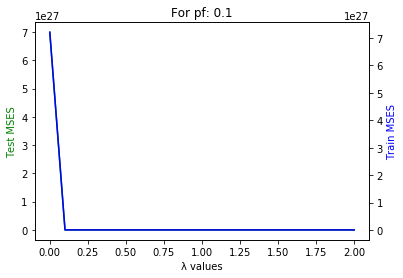

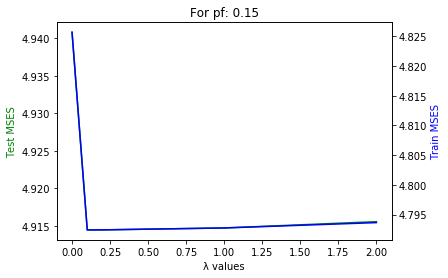

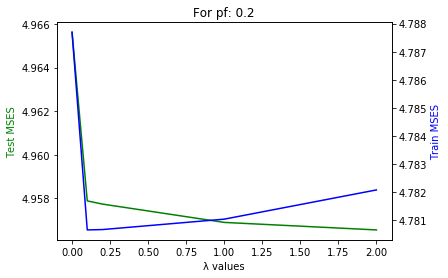

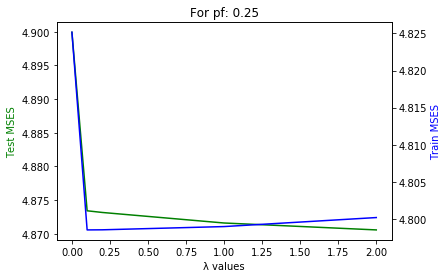

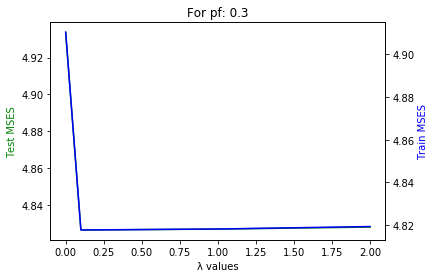

In [222]:
# Plot these values now
import matplotlib.pyplot as plt

for i, pf in enumerate(pf_list):
    fig, ax1 = plt.subplots()
    
    ax1.set_title("For pf: "+str(pf))

    ax2 = ax1.twinx()
    ax1.plot(λ_list, np.array(mses_3_test[i]).mean(axis=0), 'g-')
    ax2.plot(λ_list, np.array(mses_3_train[i]).mean(axis=0), 'b-')

    ax1.set_xlabel('λ values')
    ax1.set_ylabel('Test MSES', color='g')
    ax2.set_ylabel('Train MSES', color='b')

    plt.show()

## (G)
### Min MSE vs PF

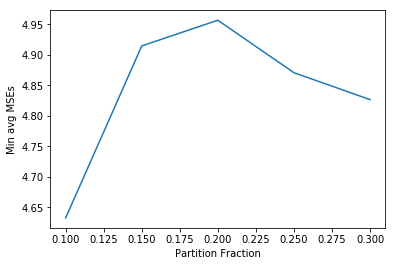

In [223]:
lst = []
arg_3 = 0

for i, pf in enumerate(pf_list):
    lst.append(np.array(mses_3_test[i]).mean(axis=0).min())

# needed for part H
arg_3 = np.array(lst).argmin()

plt.xlabel("Partition Fraction")
plt.ylabel("Min avg MSEs")
plt.plot(pf_list, lst)
plt.show()    

### λ which gave min MSE vs PF

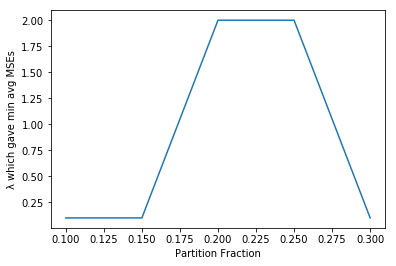

In [224]:
lst = []
for i, pf in enumerate(pf_list):
    lst.append(λ_list[np.array(mses_3_test[i]).mean(axis=0).argmin()])

plt.xlabel("Partition Fraction")
plt.ylabel("λ which gave min avg MSEs")
plt.plot(pf_list, lst)
plt.show()

## (H)

In [227]:
# Get the optimum values.
pf_o = pf_list[arg_3]
l_o = λ_list[np.array(mses_3_test[arg_3]).mean(axis=0).argmin()]


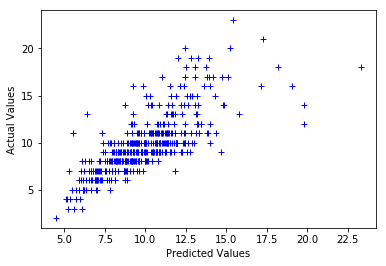

In [243]:
rawSet_3np_loop = np.array(rawSet_3)
rawSet_3np_loop_bs = []
#get means, stddev
means = rawSet_3np_loop[int(pf_o*n_lp):].mean(axis=0)
        #print("means: ", means)
stds = rawSet_3np_loop[int(pf_o*n_lp):].std(axis=0)
#print("std devs: ", stds)

        # standardise:
for line in rawSet_3np_loop:
    for i, x in enumerate(line[:-1]):
        line[i] = (line[i]-means[i])/stds[i]
                
# inserting bias term:
for i, line in enumerate(rawSet_3np):
    rawSet_3np_loop_bs.append(np.insert(rawSet_3np_loop[i], 0, 1, axis=0))
       
rawSet_3np_loop_bias = np.array(rawSet_3np_loop_bs)
        #shuffle
np.random.shuffle(rawSet_3np_loop_bias)

        # get test and train matrices
testMat_3 = rawSet_3np_loop_bias[:int(pf_o*n_lp)] 
trainMat_3 = rawSet_3np_loop_bias[int(pf_o*n_lp):]
        
        
trainX_3 = []
trainY_3 = []
for line in trainMat_3:
    trainX_3.append(line[:-1])
    trainY_3.append(line[-1])

testX_3 = []
testY_3 = []
for line in testMat_3:
    testX_3.append(line[:-1])
    testY_3.append(line[-1])
        
        
# train
cur_wts = myLinRidgeReg(trainX_3, trainY_3, l_o)
preds = myLinRidgeRegVal(testX_3, cur_wts)

plt.plot(preds, testY_3, 'b+')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

## Observations

* In this plot, most of the points like close to the 45-degree line
* The value of MSE is higher for close to 0 values of λ
* MSE rapidly decreases even on small changes to λ near λ = 0.
* After λ = 0.1, large changes to λ only cause small changes in the MSE.
* Smaller partition fraction values generally result in lower value of Minimum MSE. 

# Q4
** NOTE : The different methods use a combination of different attributes for training the model. The input matrices are generating using functions xMat&lt;num&gt; defined below**

* Most of these models use only a limited ~(1/5.5th) data for training due to limited memory.

In [1]:
# SETTUNG UP
# Free some memory
#del trainX_3
#del trainY_3


In [2]:
# Only read some of the rows (Can't process all)
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
train_df = pd.read_csv('train.csv', nrows=10000000)

In [4]:
# Add new features to this dataframe 
# Sort of like distance travelled.
# Fare amount (intuitively) should ideally highly depend on this.
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

# Drop null values
train_df = train_df.dropna(how = 'any', axis = 'rows')

In [5]:
# Add these attribs
add_travel_vector_features(train_df)

# Info about the data (first few points).
plot = train_df.iloc[:3000].plot.scatter('abs_diff_longitude', 'abs_diff_latitude')
plot #To look for outliers.
plot = train_df.iloc[:3000].plot.scatter('pickup_longitude', 'dropoff_longitude')
plot
train_df.dtypes

key                    object
fare_amount           float64
pickup_datetime        object
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count         int64
abs_diff_longitude    float64
abs_diff_latitude     float64
dtype: object

### Input Matrix (X matrix) Generating functions

In [6]:
# also add the bias weight here
def xMat(train_df):
    return np.column_stack(( train_df.pickup_longitude, train_df.pickup_latitude,
                           train_df.dropoff_latitude, train_df.dropoff_longitude, train_df.abs_diff_latitude
                           ,train_df.abs_diff_longitude, train_df.passenger_count))

def xMat2(train_df):
    return np.column_stack(( train_df.pickup_longitude, train_df.pickup_latitude,
                           train_df.dropoff_latitude, train_df.dropoff_longitude 
                           , train_df.passenger_count, np.ones(len(train_df))))
    
def xMat3(train_df):
    return np.column_stack((train_df.abs_diff_latitude
                           ,train_df.abs_diff_longitude) )

def xMat4(train_df):
    return np.column_stack(( train_df.pickup_longitude, train_df.pickup_latitude,
                           train_df.dropoff_latitude, train_df.dropoff_longitude, train_df.abs_diff_latitude
                           ,train_df.abs_diff_longitude))

### Using some of the original attributes, and linear regression.

In [7]:
# Predict using only the original Attributes
trainX_4 = xMat2(train_df)
trainY_4 = np.array(train_df['fare_amount'])

In [8]:
# Now load test data
test_df = pd.read_csv('test.csv')
add_travel_vector_features(test_df)

In [13]:
testX_4 = xMat2(test_df)


In [62]:
# Predict using various models: 
# Split into training and validation sets.
from sklearn.model_selection import train_test_split
tX, vX, tY, vY = train_test_split(trainX_4, trainY_4, test_size=0.1)



In [66]:
# Using Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=False).fit(tX, tY)

print("for cv purpose", reg.score(vX, vY))


testY_4 = reg.predict(testX_4)

# Write the predictions to a CSV file 
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': testY_4},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)



for cv purpose 0.0002763241946479589


This gives a very (bad) low score of 9.40 (MSE is 9.40)


Checking the weights of various attributes:

In [61]:
reg.coef_

array([ 0.00268801, -0.00139613, -0.00227257,  0.00383514,  0.09609533,
        0.        ])

### Using some of the original attributes, and ridgre regression

In [67]:
# Predict using various models: 
# Split into training and validation sets.
from sklearn.model_selection import train_test_split
tX, vX, tY, vY = train_test_split(trainX_4, trainY_4, test_size=0.1)



In [68]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1, fit_intercept=False)
clf.fit(tX, tY)

print("CV score: ", clf.score(vX, vY))

testY_4 = clf.predict(testX_4)

# Write the predictions to a CSV file 
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': testY_4},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

CV score:  0.00028497380456338206


This also gets a MSE of 9.40

### Using calculated parameters Ridgre Regression

Also, pruning some outliers !

In [34]:
# From the plot, most of the data points lie inside this region. 
# Points having large values in these attributes dont make sense
train_df = train_df[(train_df.abs_diff_longitude < 5.0) & (train_df.abs_diff_latitude < 5.0)]

trainX_4 = xMat3(train_df)
trainY_4 = np.array(train_df['fare_amount'])
testX_4 = xMat3(test_df)



In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
tX, vX, tY, vY = train_test_split(trainX_4, trainY_4, test_size=0.1)

clf = Ridge(alpha=1 ,fit_intercept=True)
clf.fit(tX, tY)

print("CV score: ", clf.score(vX, vY))

CV score:  0.5489861257895972


In [41]:
testY_4 = clf.predict(testX_4)

# Write the predictions to a CSV file 
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': testY_4},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

This gave MSE of **5.74634**

### Using a mix of calculated/existing attributes



In [44]:
trainX_4 = xMat(train_df)
trainY_4 = np.array(train_df['fare_amount'])
testX_4 = xMat(test_df)


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
tX, vX, tY, vY = train_test_split(trainX_4, trainY_4, test_size=0.1)

clf = Ridge(alpha=0.7 ,fit_intercept=True)
clf.fit(tX, tY)

print("CV score: ", clf.score(vX, vY))

clf.coef_

CV score:  0.5301436049333956


array([ 6.59354187e+00, -1.73997407e+00,  1.71338107e+00, -6.54345980e+00,
        7.90909113e+01,  1.47034405e+02,  5.33429431e-02])

In [59]:
testY_4 = clf.predict(testX_4)

# Write the predictions to a CSV file 
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': testY_4},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

MSE: **5.76**

### Yet another set of columns, removing the least weighed column from the previous solution

In [75]:
trainX_4 = xMat4(train_df)
trainY_4 = np.array(train_df['fare_amount'])
testX_4 = xMat4(test_df)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
tX, vX, tY, vY = train_test_split(trainX_4, trainY_4, test_size=0.1)

clf = Ridge(alpha=0.7 ,fit_intercept=True)
clf.fit(tX, tY)

print("CV score: ", clf.score(vX, vY))

clf.coef_

CV score:  0.5336121640869755


array([  6.39706261,  -3.70453652,   3.68124395,  -6.34497357,
        77.40090108, 147.78409197])

In [83]:
testY_4 = clf.predict(testX_4)

# Write the predictions to a CSV file 
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': testY_4},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

MSE: ** 5.75676 **

### Using Random Forest Regression

In [10]:
trainX_4 = xMat(train_df)
trainY_4 = np.array(train_df['fare_amount'])
testX_4 = xMat(test_df)


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

tX, vX, tY, vY = train_test_split(trainX_4, trainY_4, test_size=0.1)

clf = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
clf.fit(tX, tY)

print("CV score: ", clf.score(vX, vY))


CV score:  0.5982506213453175


In [13]:
testY_4 = clf.predict(testX_4)

# Write the predictions to a CSV file 
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': testY_4},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

MSE: **5.24570
**

### Random Forests Regresser (2) - Optmized parameters, not using passenger count attrib (low weight)

In [17]:
trainX_4 = xMat3(train_df)
trainY_4 = np.array(train_df['fare_amount'])
testX_4 = xMat3(test_df)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

tX, vX, tY, vY = train_test_split(trainX_4, trainY_4, test_size=0.1)

clf = RandomForestRegressor(max_depth=22, n_estimators=40, max_features=0.5)
clf.fit(tX, tY)

print("CV score: ", clf.score(vX, vY))


CV score:  0.7412363171163237


In [20]:
testY_4 = clf.predict(testX_4)

# Write the predictions to a CSV file 
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': testY_4},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

MSE: **4.00283**

### Report

** Best 2 scores ** : MSE : 4.00 and 5.24

Both were achieved using Random Forest Regressors. Using all the attributes (except time) and the calculated attributes, and higher number of low depth trees resulted in an MSE of 5.24

Optimization of this, and using fewer attributes (differences in lat/long) to save memory, resulted in a good cross validation score when number of trees was 40, and max-depth was 22. That model gave an MSE  of 4.00

These methods gave better results, because we are using a small part of the whole training data. Random forests reduce the bias of the model, and hence resulted in a better score. The models without any feature engineering (first 2) gave a bad score, because the fare actually depends more on the distance travelled.

Adding easy to calculate features - difference in latitude and longitude improved results, improved the MSE for Ridge Regression models.

The top two models also remove the outlier points - whose difference in lat/long (and thus also individual values) is high, and are most likely erroneous points. This results in a better model. 